# Basic Impact-Z example


This is a basica example using the parameters described in:

C. Mayes, R. Ryne, D. Sagan
3D SPACE CHARGE IN BMAD
https://epaper.kek.jp/ipac2018/papers/thpak085.pdf

# Imports

In [1]:
from impact import ImpactZ
import impact.z as IZ

from pmd_beamphysics.units import mec2, c_light
import numpy as np
import os

# Parameters

Set some parameters to be used in the input

In [2]:
energy0 = 10e6
gamma0 = energy0 / mec2
betagamma0 = np.sqrt(gamma0**2 - 1)
sigma_x0 = 1e-3
sigma_y0 = 1e-3
sigma_z0 = 0.1e-3

beta_x0 = 1000
beta_y0 = 100
n_particle = 100_000

# Impact-Z input

The input object contains the header and lattice information.

In [3]:
input = IZ.ImpactZInput(
    initial_particles=None,
    n_particle=n_particle,
    nx=32,
    ny=32,
    nz=32,
    distribution=IZ.DistributionType.gauss,
    twiss_beta_x=beta_x0,
    twiss_norm_emit_x=sigma_x0**2 * betagamma0 / beta_x0,
    twiss_beta_y=beta_y0,
    twiss_norm_emit_y=sigma_y0**2 * betagamma0 / beta_y0,
    average_current=0.13,
    reference_kinetic_energy=energy0 - mec2,
    reference_particle_mass=mec2,
    reference_particle_charge=-1.0,
    reference_frequency=1300000000.0,
    lattice=[
        IZ.WriteFull(name="initial_particles", file_id=100),
        IZ.Drift(
            name="MyDrift",
            length=1.0,
            steps=100,
            map_steps=100,
        ),
        IZ.WriteFull(name="final_particles", file_id=101),
    ],
)

A convenience function will set the longitudinal distribution from rms duration and energy spread:

In [4]:
input.set_twiss_z(sigma_t=0.1e-3 / c_light, sigma_energy=1)

Here is a compact readback. Note that values that are default are not displayed

In [5]:
input

ImpactZInput(
    initial_particles=None,
    ncpu_y=1,
    ncpu_z=1,
    gpu=IZ.GPUFlag.disabled,
    seed=0,
    n_particle=100000,
    integrator_type=IZ.IntegratorType.linear_map,
    err=1,
    diagnostic_type=IZ.DiagnosticType.extended,
    nx=32,
    ny=32,
    nz=32,
    boundary_type=IZ.BoundaryType.trans_open_longi_open,
    radius_x=0.0,
    radius_y=0.0,
    z_period_size=0.0,
    distribution=IZ.DistributionType.gauss,
    restart=0,
    subcycle=0,
    nbunch=1,
    particle_list=[0],
    current_list=[0.0],
    charge_over_mass_list=[0.0],
    twiss_alpha_x=0.0,
    twiss_beta_x=1000.0,
    twiss_norm_emit_x=1.954394516081986e-08,
    twiss_mismatch_x=1.0,
    twiss_mismatch_px=1.0,
    twiss_offset_x=0.0,
    twiss_offset_px=0.0,
    twiss_alpha_y=0.0,
    twiss_beta_y=100.0,
    twiss_norm_emit_y=1.9543945160819862e-07,
    twiss_mismatch_y=1.0,
    twiss_mismatch_py=1.0,
    twiss_offset_y=0.0,
    twiss_offset_py=0.0,
    twiss_alpha_z=1e-09,
    twiss_beta_z=156107.99655273516,
    twiss_norm_emit_z=1.5610799655273516e-07,
    twiss_mismatch_z=1.0,
    twiss_mismatch_e_z=1.0,
    twiss_offset_phase_z=0.0,
    twiss_offset_energy_z=0.0,
    average_current=0.13,
    reference_kinetic_energy=9489001.04931,
    reference_particle_mass=510998.95069,
    reference_particle_charge=-1.0,
    reference_frequency=1300000000.0,
    initial_phase_ref=0.0,
    lattice=[
        WriteFull(
            name='initial_particles',
            metadata={},
            length=0.0,
            steps=0,
            file_id=100,
            type_id=-2,
            unused_2=0.0,
            sample_frequency=0
        ),
        Drift(
            name='MyDrift',
            metadata={},
            length=1.0,
            steps=100,
            map_steps=100,
            type_id=0,
            radius=1.0
        ),
        WriteFull(
            name='final_particles',
            metadata={},
            length=0.0,
            steps=0,
            file_id=101,
            type_id=-2,
            unused_2=0.0,
            sample_frequency=0
        )
    ],
    filename=None,
    verbose=False
)

# Create ImpactZ object from input

In [6]:
I = ImpactZ(input)

# Run

In [7]:
I.run()

<!-- lume-impact detected Jupyter and will use HTML for rendering. -->

  0%|          | 0/3 [00:00<?, ?it/s]

ImpactZOutput(
    run=RunInfo(
        error=False,
        error_reason='',
        run_script='/home/runner/miniconda3/envs/lume-impact-dev/bin/ImpactZexe',
        run_time=4.741882498999985
    ),
    stats=OutputStats(
        beta_ref=array([0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355, 0.99869355, 0.99869355, 0.99869355, 0.99869355,
       0.99869355]),
        charge_state_n_particle=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        gamma_ref=array([19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181, 19.56951181, 19.56951181, 19.56951181, 19.56951181,
       19.56951181]),
        kinetic_energy_ref=array([9489001.04931, 9489001.04931, 9489001.04931, 9489001.04931,
       9489001.04931, 9489001.04931, 9489001.04931, 9489001.04931,
       9489001.04931, 9489001.04931, 9489001.04931, 9489001.04931,
       9489001.04931, 9489001.04931, 9489001.04931, 9489001.04931,
       9489001.04931, 9489001.04931, 9489001.04931, 9489001.04931,
       9489001.04931, 9489001.04931, 9489001.04931, 9489001.04931,
       9489001.04931, 9489001.04931, 9489001.04931, 9489001.04931,
       9489001.04931, 9489001.04931, 9489001.0493

# Plot

Plotting accepts any key that from the output statistics.

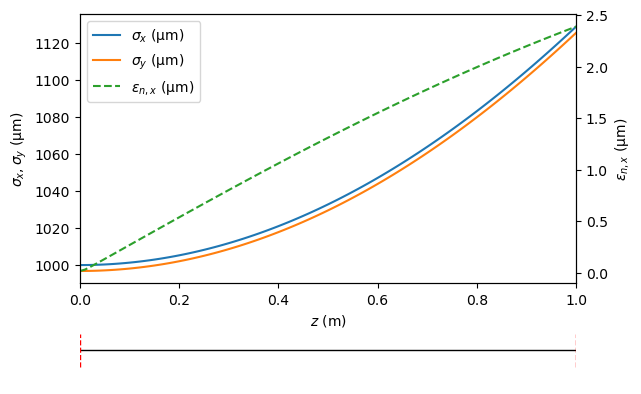

In [8]:
I.plot(["sigma_x", "sigma_y"], y2="norm_emit_x")

# Extract particles

In [9]:
P0 = I.output.particles["initial_particles"]
P1 = I.output.particles["final_particles"]

Check consistency with the initial particle sizes

In [10]:
P0 = I.output.particles["initial_particles"]
(
    P0["sigma_x"] / sigma_x0,
    P0["sigma_y"] / sigma_y0,
    P0["sigma_t"] * c_light / sigma_z0,
    P0["mean_energy"] / energy0,
)

(np.float64(1.000135340064495),
 np.float64(0.9969477451982962),
 np.float64(0.9984894952855283),
 np.float64(0.9999999992327983))

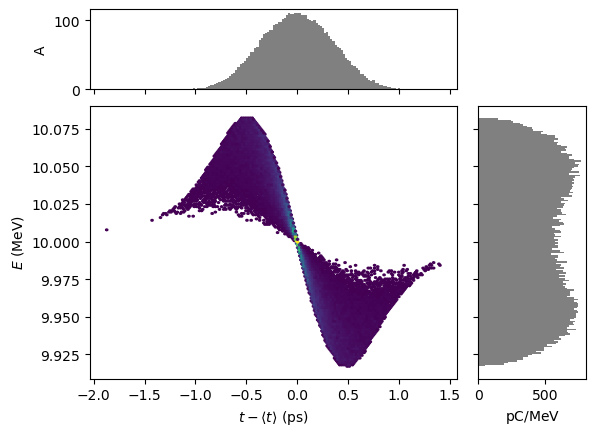

In [11]:
P1.plot("delta_t", "energy")

# Try again with particles

In [12]:
I2 = ImpactZ(input, initial_particles=P0)
I2.run()
P3 = I2.output.particles["initial_particles"]
P4 = I2.output.particles["final_particles"]

  0%|          | 0/3 [00:00<?, ?it/s]

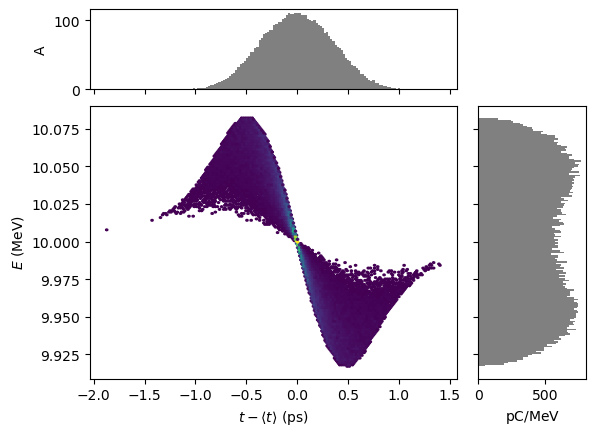

In [13]:
P4.plot("delta_t", "energy")

# Archiving and readback

In [14]:
I.archive("impactz.h5")

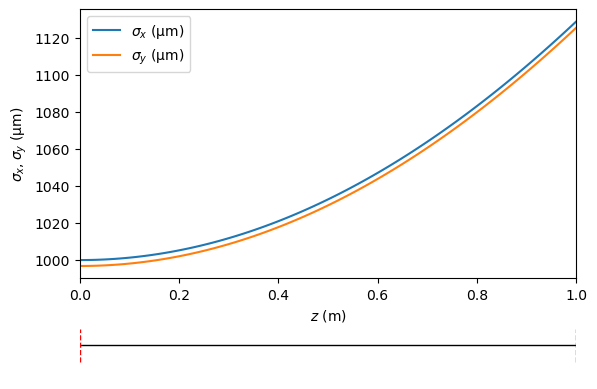

In [15]:
I2 = ImpactZ.from_archive("impactz.h5")

I2.plot()

# Cleanup

In [16]:
os.remove("impactz.h5")